# Détection des bio-marqueurs pour le cancer colorectal

## Etudiants
- Potet Bastien
- Kot Chau Ying

In [1]:
import os
import numpy as np
import pylab as plt
%matplotlib inline
import pandas as pd

In [2]:
import numpy as np
from Bio import Geo

def load_geo(myfile):
    handle = open(myfile)
    records = Geo.parse(handle)
    return records

records = load_geo('data/GSE21510_family.soft')

In [3]:
nr = next(records)
print(nr)
print('\n---------------------- ENTITY_ATTRIBUTES:------------------------------\n')
print(nr.entity_attributes)

GEO Type: DATABASE
GEO Id: GeoMiame
Database_email: geo@ncbi.nlm.nih.gov

Database_institute: NCBI NLM NIH

Database_name: Gene Expression Omnibus (GEO)

Database_web_link: http://www.ncbi.nlm.nih.gov/geo

Column Header Definitions


---------------------- ENTITY_ATTRIBUTES:------------------------------

{'Database_name': 'Gene Expression Omnibus (GEO)', 'Database_institute': 'NCBI NLM NIH', 'Database_web_link': 'http://www.ncbi.nlm.nih.gov/geo', 'Database_email': 'geo@ncbi.nlm.nih.gov'}


In [4]:
# start by re-loading the data
records = load_geo('data/GSE21510_family.soft')


id_cond = {}

dict_gene = dict()

values = []
exp_id = []
id_ref = []

# loop over records
for r in records:

    rea = r.entity_attributes

    if 'Sample_characteristics_ch1' in rea :
        sample = rea['Sample_description'][1]
        desc = rea["Sample_characteristics_ch1"]
        id_cond[sample] = desc

    if 'sample_table_begin' in rea:
        val = np.array(r.table_rows)
        if len(id_ref) == 0:
            id_ref = val[1:,0]
        values.append(val[1:,1])
        exp_id.append(r.entity_attributes['Sample_description'][1])

    if 'platform_table_begin' in rea :
        for i in r.table_rows :
            dict_gene[i[0]] = i[1]




In [5]:
# converts data to an array (more practical to handle)
values = np.array(values)

data = [id_ref]
for val in values:
    data.append(val)
    
exp_id = np.array(exp_id)
exp_id = np.insert(exp_id, 0, 'name_gene')

data = np.array(data)

data = np.insert(data, 0, exp_id, axis=1)

In [6]:
metastatis_list = []
stage_list = []
tissue_list = []

for k in id_cond:
    v = id_cond[k]
    metastatis = v[0].split(':')[1].strip()
    stage = v[1].split(':')[1].strip()
    tissue = v[2].split(':')[1].split(',')[0].strip() + stage
    
    metastatis_list.append(metastatis)
    stage_list.append(stage)
    tissue_list.append(tissue)
    
    id_cond[k] = [metastatis, stage, tissue]

metastatis_list = list(set(metastatis_list))
stage_list = list(set(stage_list))
tissue_list = list(set(tissue_list))

In [7]:
print(metastatis_list)
print(stage_list)
print(tissue_list)

['metastatic recurrence', 'none', 'metastasis']
['3b', '3c', '3a', '4', '2b', '0', '1', '2a']
['cancer3c', 'normal2a', 'normal3c', 'cancer4', 'cancer3a', 'normal3b', 'normal1', 'normal4', 'cancer3b', 'cancer2a', 'normal2b', 'normal0', 'cancer1', 'cancer2b']


In [8]:
data = np.transpose(data)

In [9]:
'''
import random
k = 6
idx_test = random.sample(range(len(id_cond)), k)
idx_train = list(range(0, len(id_cond) + 2))
[idx_train.remove(i) for i in idx_test]

data_test = data[idx_test, :]
data = data[idx_train, :]

print(np.shape(data))
print(np.shape(data_test))
'''
id_cond

{'C006': ['metastatic recurrence', '2b', 'cancer2b'],
 'C100': ['none', '3b', 'cancer3b'],
 'C101': ['none', '3b', 'cancer3b'],
 'C102': ['none', '2b', 'cancer2b'],
 'C103': ['none', '3b', 'cancer3b'],
 'C104': ['metastasis', '4', 'cancer4'],
 'C107': ['none', '2a', 'cancer2a'],
 'C108': ['none', '2a', 'cancer2a'],
 'C110': ['none', '3b', 'cancer3b'],
 'C111': ['metastasis', '4', 'cancer4'],
 'C113': ['metastasis', '4', 'cancer4'],
 'C115': ['none', '1', 'cancer1'],
 'C116': ['none', '2b', 'cancer2b'],
 'C117': ['metastatic recurrence', '3b', 'cancer3b'],
 'C118': ['metastasis', '4', 'cancer4'],
 'C119': ['none', '1', 'cancer1'],
 'C011': ['metastasis', '4', 'cancer4'],
 'C123': ['none', '2b', 'cancer2b'],
 'C124': ['none', '2a', 'cancer2a'],
 'C125': ['none', '2a', 'cancer2a'],
 'C127': ['none', '2b', 'cancer2b'],
 'C128': ['metastasis', '4', 'cancer4'],
 'C134': ['metastasis', '4', 'cancer4'],
 'C135': ['none', '3b', 'cancer3b'],
 'C136': ['none', '3c', 'cancer3c'],
 'C138': ['none',

In [90]:
print('cell_type:\t\t'+str(tissue_list))
cancer_l = ['cancer1', 'cancer2a', 'cancer2b','cancer3a','cancer3b', 'cancer3c','cancer4'  ]
for c in cancer_l : 
    tissue_list.remove(c)
for c in cancer_l : 
    tissue_list.append(c)
print('\nre-ordered cell_type:\t'+str(tissue_list))

unique_colors = ['olivedrab','powderblue', 'darkolivegreen','lightblue','forestgreen', 'skyblue', 'green',
                 'peachpuff', 'brown', 'bisque', 'red', 'moccasin', 'sienna', 'wheat']
colors_tissue = []

idx_cell_type = [0]

for j,ct in enumerate(tissue_list):
    elements_cell_type = [ i+1 for i,c in enumerate(data[0,1:]) if id_cond[c][2]==ct]
    idx_cell_type.extend(elements_cell_type)
    colors_tissue.extend([unique_colors[j]]*len(elements_cell_type)) 
    
print('\nidx_cell_type:\t'+str(idx_cell_type))    
print('\ncolors_cell_type:\t'+str(colors_tissue))

# re-order columns of data (= conditions) with idx_cell_type
data = data[:,idx_cell_type]



cell_type:		['normal2a', 'normal3c', 'normal3b', 'normal1', 'normal4', 'normal2b', 'normal0', 'cancer1', 'cancer2a', 'cancer2b', 'cancer3a', 'cancer3b', 'cancer3c', 'cancer4']

re-ordered cell_type:	['normal2a', 'normal3c', 'normal3b', 'normal1', 'normal4', 'normal2b', 'normal0', 'cancer1', 'cancer2a', 'cancer2b', 'cancer3a', 'cancer3b', 'cancer3c', 'cancer4']

idx_cell_type:	[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 

14

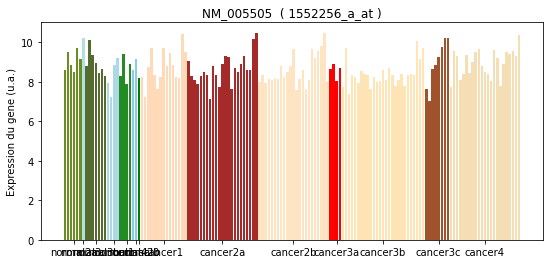

In [91]:
def plot_gene_expression_across_conditions(data,gene,tissue_type, colors_cell_type):
    
    # find the line in data corresponding to our gene of interest and get the gene expression levels
    idx_gene = [i for i,x in enumerate(data[:,0]) if x==gene][0]
    
    data_to_show = (data[idx_gene,1:]).tolist() # remove the first elements corresponding to gene name and identifier
    data_to_show = np.array(data_to_show,dtype=float) # convert to float

    
    # plot the data
    fig, ax = plt.subplots(figsize=(9,4))
    plt.bar(range(0,len(data_to_show)),data_to_show, color = colors_cell_type)
    plt.title(dict_gene[data[idx_gene,0]]+'  ( '+data[idx_gene,0]+' )')
    ax.set_xticks([3, 6, 10, 16, 20, 23, 24, 32, 51, 74, 88, 103, 121, 136])
    ax.set_xticklabels([ct.replace(' ','\n').replace('plus','+') for ct in tissue_type])
    ax.set_ylabel('Expression du gene (u.a.)')
    
    
    return idx_gene

# gene of interest
gene = '1552256_a_at' 
# gene = '206067_s_at'
plot_gene_expression_across_conditions(data,gene,tissue_list, colors_tissue)

In [12]:
desired_profile = [1 if 'cancer' in id_cond[s][2] else 0 for s in data[0,1:]]
print('desired_profile = '+str(desired_profile))


desired_profile = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Text(0.5, 1.0, 'Desired profile')

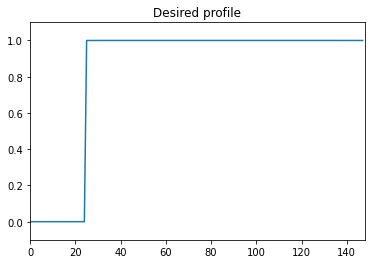

In [13]:
fig = plt.figure()

# plot desired_profile
plt.plot(desired_profile)
plt.ylim([-0.1,1.1])
plt.xlim([0,len(desired_profile)])
plt.title('Desired profile')

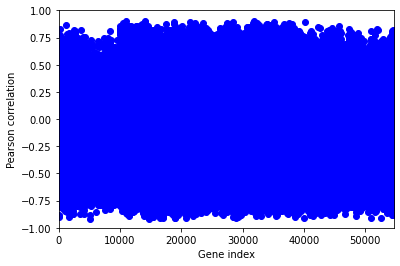

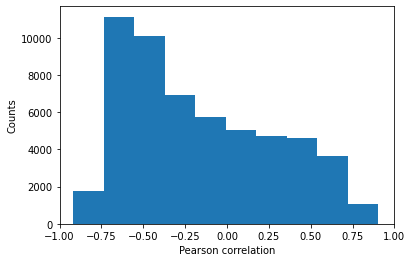

In [14]:
def pearson_genes(data,desired_profile,show_plot=1):

    import scipy.stats as ss

    correl = [] # contains the correlation for each gene
    correl_p  = [] # for now, do not try to understand what correl_p is...
    
    # loop over genes
    for i in range(np.shape(data)[0]-1): # do not consider first line of data (=header)
        
        gene_expression = data[i+1,1:] # do not consider first column (= gene identifiers)
        gene_expression = np.array(gene_expression,dtype=float) # convert to float
        
        pearson_corr = ss.pearsonr(gene_expression,desired_profile) # calculate Pearson correlation
        correl.append(pearson_corr[0])
        correl_p.append(pearson_corr[1]) # forget about this for now...
        
    correl = np.array(correl,dtype=float) # convert to array... easier to manipulate
    
    # plot correlation values
    if show_plot:
        fig = plt.figure()
        plt.plot(correl,'bo')
        plt.ylim([-1,1])
        plt.xlim([0,len(correl)])
        plt.xlabel('Gene index')
        plt.ylabel('Pearson correlation')
        plt.show()
        
        plt.figure()
        plt.hist(correl)
        plt.xlabel('Pearson correlation')
        plt.ylabel('Counts')
        plt.xlim([-1,1])
        plt.show()

    return (correl,correl_p)

co = pearson_genes(data,desired_profile)
corr = co[0]

In [15]:
def shuffle_data(data):
    
    from random import shuffle
       
    shuffled_idx = np.zeros(data.shape[1],dtype=int)
    shuffled_idx[1:] = np.random.sample(shuffled_idx.shape[0]-1).argsort()+1
        
    shuffled_idx = np.tile(shuffled_idx,(data.shape[0],1))
    data_random = np.take_along_axis(data, shuffled_idx, axis=1)
    data_random[0,:] = data[0,:]

    return data_random

data_random = shuffle_data(data)
print(str(data[3,0:10])+' = un gène NON randomisé')
print(str(data_random[3,0:10])+' = le même gène avec les conditions randomisées')

['117_at' '5.780952667' '5.815203205' '5.682485043' '5.602044453'
 '5.529724996' '5.631280715' '5.472282587' '5.84125843' '5.620819699'] = un gène NON randomisé
['117_at' '5.422518561' '5.450263951' '5.290933193' '5.780952667'
 '5.529724996' '5.312956822' '5.471487621' '5.444159431' '5.786037253'] = le même gène avec les conditions randomisées


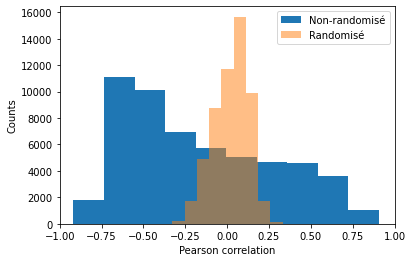

In [16]:
def histogram_pearson(data, desired_profile):
    co_ra = pearson_genes(data_random,desired_profile,show_plot=0)
    corr_ra = co_ra[0]

    plt.figure()
    plt.hist(corr)
    plt.hist(corr_ra,alpha=0.5)
    plt.xlabel('Pearson correlation')
    plt.ylabel('Counts')
    plt.xlim([-1,1])
    plt.legend(["Non-randomisé", "Randomisé"])
    plt.show()
    
histogram_pearson(data_random, desired_profile)

In [17]:
from tqdm.auto import tqdm
res = []
if False: 
    for i in tqdm(range(1500)) :
        data_random = shuffle_data(data)
        correl, _ = pearson_genes(data_random,desired_profile, 0)
        res.append(correl)

    res = np.array(res)
    np.save("random", res)

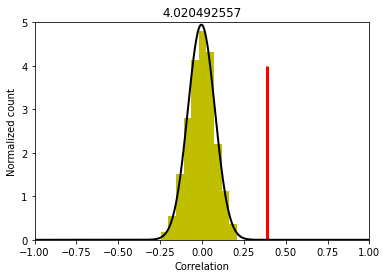

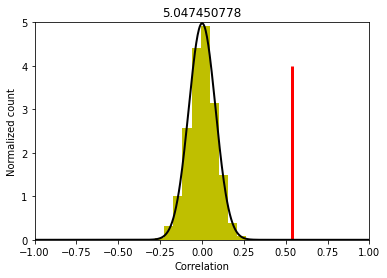

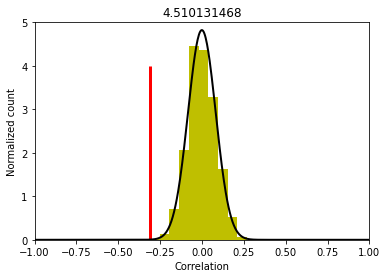

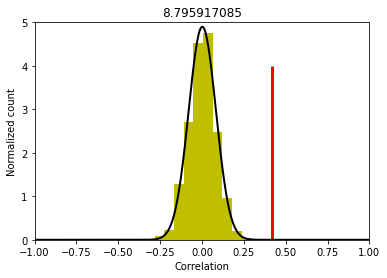

In [18]:
from scipy.stats import norm

corr_random = np.load('random.npy')
corr_random = np.transpose(corr_random)

# show results only for these genes
idx_genes_to_show = [4181,8590,5592,17836] 

# plot: loop over idx_genes_to_show
for idx in idx_genes_to_show: 
    fig = plt.figure()
    random_correlations = corr_random[idx,:]
    #plt.hist(random_correlations,normed=True,color='w') # ,normed=True # histogramme des valeurs de corrélation obtenues à partir des données randomisées
    plt.hist(random_correlations,density=1,color='y')
    
    plt.vlines(corr[idx],0,4,'r',lw=3) # valeur observée = ligne verticale rouge
    plt.title(data[idx+1,1]) # nom du gène
    plt.xlim([-1,1])
    plt.ylim([0, 5])
    plt.xlabel('Correlation')
    plt.ylabel('Normalized count')
    
    # fit gaussian to distribution of correlations from randomized data
    xx = np.linspace(-1,1,500)
    mu = np.mean(random_correlations)
    sigma = np.std(random_correlations)
    plt.plot(xx,norm.pdf(xx,loc=mu,scale=sigma),'k-',lw=2)

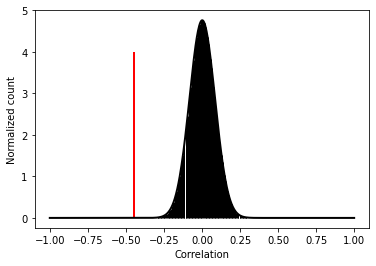

In [19]:
N_genes = np.shape(data)[0]-1 # number of genes in the data
pval_correl = [] # p-values 
remove_idx = []
for idx in range(0,N_genes):
    
    # random correlation: calculate mean and standard deviation
    random_correlations = corr_random[idx,:]
    mean_random = np.mean(random_correlations)
    std_random = np.std(random_correlations)
        
    
    # observed correlation
    observed_correlation = corr[idx]
    
    # cdf: cumulative distribution function = integral of the gaussian distribution from -inf to observed_correlation
    # cdf = norm.cdf(observed_correlation,loc=mean_random,scale=std_random)
    #if cdf >= 0.5 :
    #    p = 1 - cdf
    #else:
    #    p = cdf
    #pval_correl.append(2*p) # factor 2 because correlations can take both positive and negative values

    cdf = norm.cdf(-np.abs(observed_correlation),loc=mean_random,scale=std_random)
    pval_correl.append(2*cdf)
    
    if idx==0:
       # print("random_correlations",random_correlations)
       # print("mean",mean_random)
       # print("std_random",std_random)
        plt.figure()
        plt.plot(xx,norm.pdf(xx,loc=mean_random,scale=std_random),'k-',lw=2)
        plt.vlines(observed_correlation,0,4 ,'r',lw=2)
        for j in np.linspace(observed_correlation,1,int(100*(1-observed_correlation))):
            plt.vlines(j,0,norm.pdf(j,loc=mean_random,scale=std_random),'k',lw=1)
        for j in np.linspace(-1,-observed_correlation,int(100*(1-observed_correlation))):
            plt.vlines(j,0,norm.pdf(j,loc=mean_random,scale=std_random),'k',lw=1)
        plt.xlabel('Correlation')
        plt.ylabel('Normalized count')
        plt.show()
    

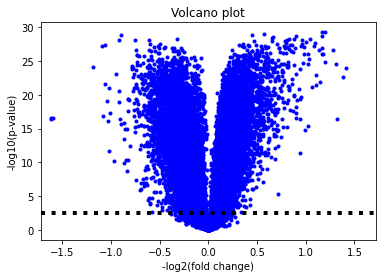

In [20]:
import stats
stats.volcano_plot(data[1:,1:],desired_profile,pval=pval_correl)

-log10(p-value FDR) = 2.493936276975202



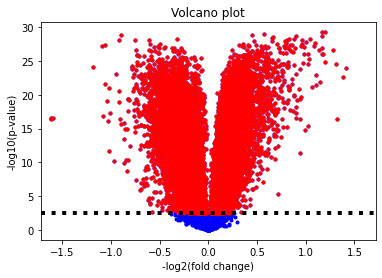

40291 significant genes found with correlation (after p-value correction): 
['1007_s_at' '1053_at' '121_at' ... 'AFFX-r2-Ec-bioD-5_at'
 'AFFX-r2-P1-cre-3_at' 'AFFX-r2-P1-cre-5_at']


In [21]:
# Multiple-testing-corrected p-value
fdr_pval = stats.fdr_correction(pval_correl)
print('-log10(p-value FDR) = '+str(-np.log10(fdr_pval))+'\n')

# idx of genes with p-value < fdr_pval
idx_sg_corr = np.array([i for i,p in enumerate(pval_correl) if p<fdr_pval])

# Volcano plot that shows significant genes in red
stats.volcano_plot(data[1:,1:],desired_profile,pval=pval_correl,idx=idx_sg_corr)

# print name of most significant genes
print(str(len(idx_sg_corr))+' significant genes found with correlation (after p-value correction): \n'+str(data[idx_sg_corr+1,0]))

(0.0, 1.0)

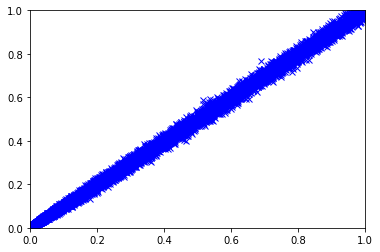

In [22]:
plt.figure()
plt.plot(co[1],pval_correl,'bx')
plt.xlim([0,1])
plt.ylim([0,1])

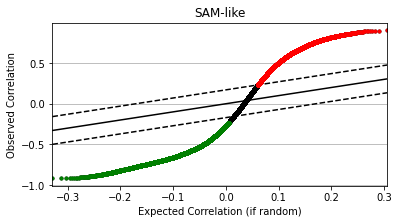

In [23]:
## -- SAM-like with correlation -- ##

# correlation per gene, random correlation per gene
corr_S = np.sort(corr)
corr_random_S = np.sort(corr_random,0)
corr_random_mean = np.mean(corr_random_S,1)

# significance thresholds: get approximation of delta for FDR ~ 5%
corr_fdr = norm.ppf(1-fdr_pval/2.0,loc=np.mean(corr_random_mean),scale=np.std(corr_random_mean))

idx_sign_up = [i for i,c in enumerate(corr_S) if c>=corr_fdr]
idx_sign_down = [i for i,c in enumerate(corr_S) if c<=-corr_fdr]
delta = corr_fdr - corr_random_mean[idx_sign_up[0]]

# plot
plt.figure(figsize=(6,3))
plt.plot(corr_random_mean,corr_S,'k.')
plt.xlabel('Expected Correlation (if random)')
plt.ylabel('Observed Correlation')
plt.gca().yaxis.grid(True)
plt.title('SAM-like')
minx = min(corr_random_mean)
maxx = max(corr_random_mean)
plt.xlim([minx,maxx])
xx = np.linspace(minx,maxx,10)
plt.plot(xx,xx,'k-')
plt.plot(xx,xx+delta,'k--')
plt.plot(xx,xx-delta,'k--')
plt.plot(corr_random_mean[idx_sign_up],corr_S[idx_sign_up],'r.')
plt.plot(corr_random_mean[idx_sign_down],corr_S[idx_sign_down],'g.')


**Commentaire**

On effectue le ttest tous les normal vs cancer_stage, car pour certain gene (eg. _AFFX-r2-P1-cre-5_at_) il existe des cellules qui on une exprésion équivalent que une cellule normal. Comme nous avons une disproportionaité normal vs cancer on peut tous regrouper pour évaluer leur corrélation, ceci fauserait le résultat.

In [56]:
from scipy.stats import ttest_ind

N_genes = np.shape(data)[0]-1 # number of genes 
idx_normal = [i+1 for i,c in enumerate(data[0,1:]) if 'normal' in id_cond[c][2]] # column idx with leukemia
print(len(idx_normal))
# perform t-test between cancer cell type and each normal cell type
pval_ct = [] # p-value across cell types
for k,ct in enumerate(tissue_list[7:]):   
    print(ct)
    idx_cancer = [i+1 for i,c in enumerate(data[0,1:]) if id_cond[c][2]==ct] # column idx corresponding to a cell type
    print(idx_cancer)
    print(len(idx_cancer))
    pval = []
    for g in range(1,N_genes+1): # loop over genes
    
        normal = np.array(data[g,idx_normal],dtype=float)
        cancer = np.array(data[g,idx_cancer],dtype=float)
        ttest = ttest_ind(normal,cancer,equal_var=False) # return t-value and its associated p-value
        pval.append(ttest[1])
    pval_ct.append(pval)
    

25
cancer1
[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
15
cancer2a
[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
23
cancer2b
[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
23
cancer3a
[87, 88, 89, 90]
4
cancer3b
[91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]
27
cancer3c
[118, 119, 120, 121, 122, 123, 124, 125]
8
cancer4
[126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]
23


In [26]:
import importlib

# fdr correction
importlib.reload(stats)
fdr_pval = [stats.fdr_correction(pval_ct[ct]) for ct in range(len(pval_ct))]
# keep genes for which the t-test p-value is smaller than the fdr-corrected threshold (fdr_pval)
idx_sg_ttest = []
for i in range(N_genes):
    significant = [1 if pval_ct[ct][i]<fdr_pval[ct] else 0 for ct in range(len(pval_ct))]
    if sum(significant)==7:
        idx_sg_ttest.append(i)
        
        
# keep only genes that appear significantly in each t-test AND in the correlation test
idx_sg_final = np.array( list( set(idx_sg_ttest) & set(idx_sg_corr) ) )
print(len(idx_sg_final))
print('LISTE FINALE DE GENES:\n'+str(data[idx_sg_final+1,0]).strip('[]'))

4849
LISTE FINALE DE GENES:
'206938_at' '206941_x_at' '231710_at' ... '215277_at' '215278_at'
 '223490_s_at'


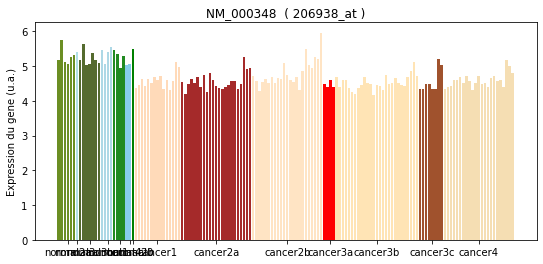

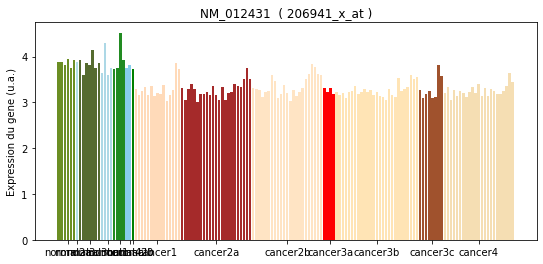

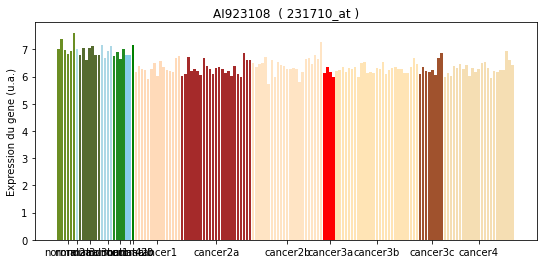

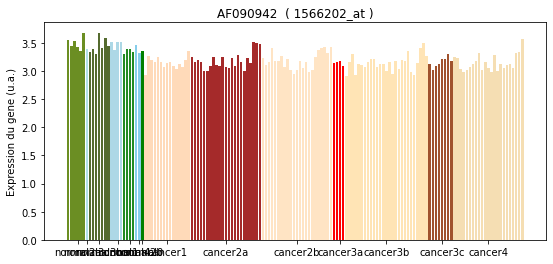

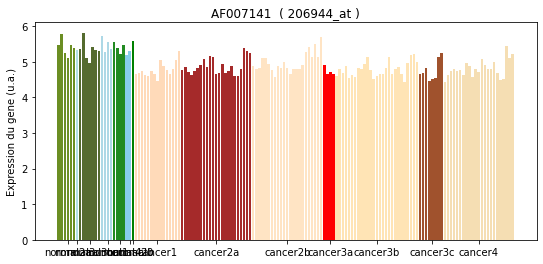

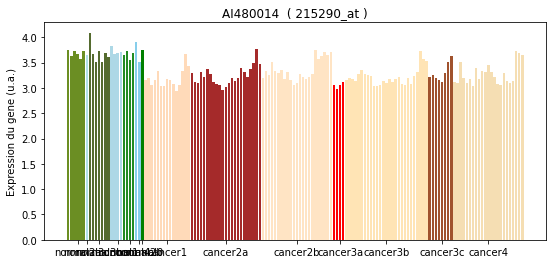

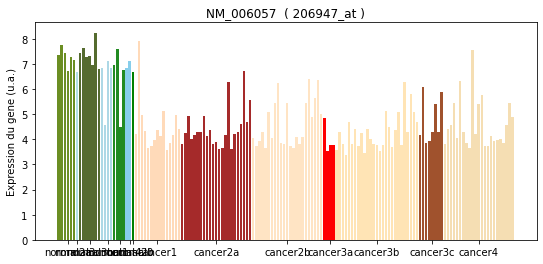

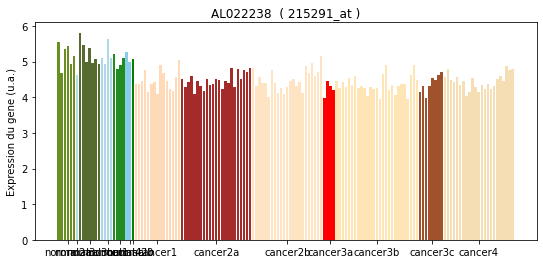

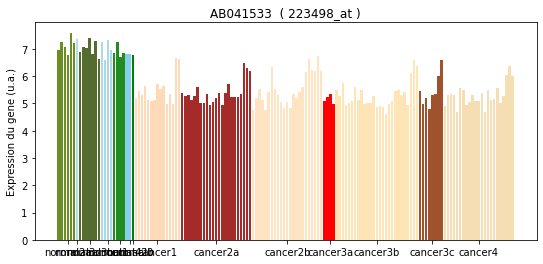

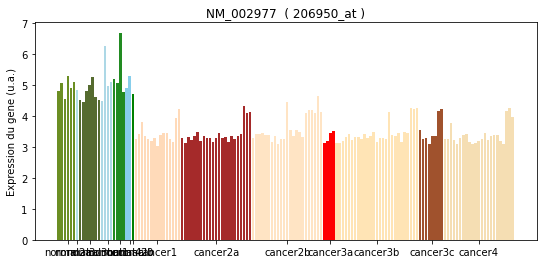

In [92]:
for gene in data[idx_sg_final[:10]+1,0]:
    plot_gene_expression_across_conditions(data, gene,tissue_list, colors_tissue)

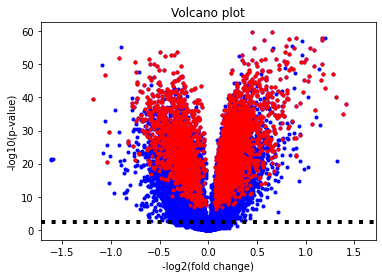

In [28]:
stats.volcano_plot(data[1:,1:], desired_profile, idx =idx_sg_final )